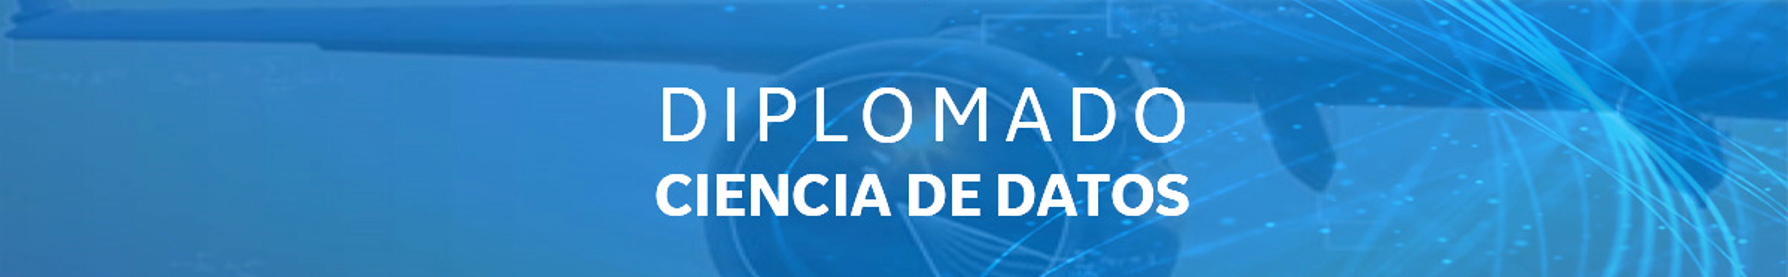

# Ingeniería de Variables (Laboratorio)

Usando el conjunto de datos de Coches de 1993 (Con información faltante) hacer lo siguiente:

1. Identificar el tipo de datos faltantes (_MCAR_, _MAR_, _MNAR_) y definir una estrategia para sobrellevar con esta condición
2. Utilizar una _estrategia de imputación_ para el manejo de datos faltantes, y justificar él porque
3. Usar gráficos para ver el antes y después de la imputación
4. Usando los datos imputados, realizar un estudio de correlación. Use la variable `MPG.city` (_Miles per Gallon at City_) como variable objetivo (_Y_)
5. Explique porque se decidió eliminar columnas (Si es el caso)

In [1]:
# Cargar Librerias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Leer datos de Internet
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [5]:
# Contar datos faltantes

df.isnull().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

# 1) Identificar el tipo de datos faltantes (MCAR, MAR, MNAR) y definir una estrategia para sobrellevar con esta condición

<AxesSubplot:>

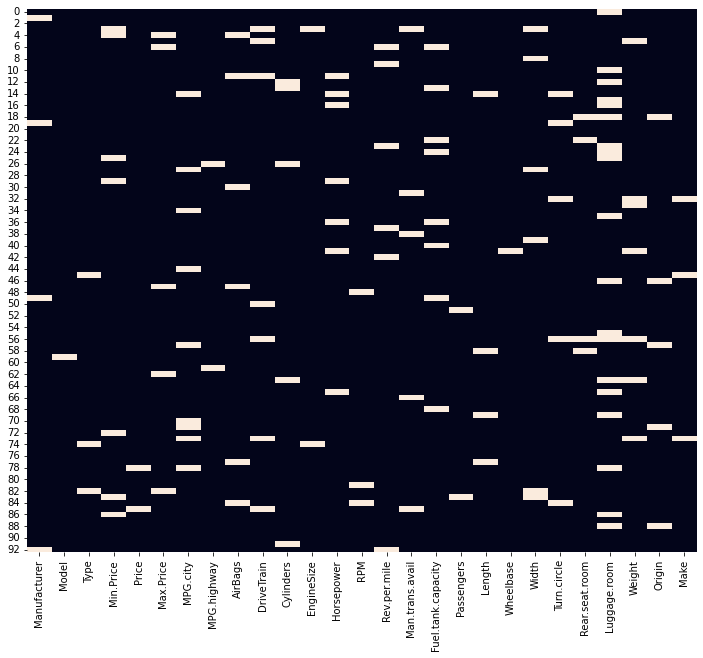

In [7]:
# 1) Identificar el tipo de datos faltantes (MCAR, MAR, MNAR) y definir una estrategia para sobrellevar con esta condición
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.isnull().sum() / df.shape[0] * 100

Manufacturer           4.301075
Model                  1.075269
Type                   3.225806
Min.Price              7.526882
Price                  2.150538
Max.Price              5.376344
MPG.city               9.677419
MPG.highway            2.150538
AirBags                6.451613
DriveTrain             7.526882
Cylinders              5.376344
EngineSize             2.150538
Horsepower             7.526882
RPM                    3.225806
Rev.per.mile           6.451613
Man.trans.avail        5.376344
Fuel.tank.capacity     8.602151
Passengers             2.150538
Length                 4.301075
Wheelbase              1.075269
Width                  6.451613
Turn.circle            5.376344
Rear.seat.room         4.301075
Luggage.room          20.430108
Weight                 7.526882
Origin                 5.376344
Make                   3.225806
dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             87 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.trans.avail     88 non-null     object 
 16  Fuel.tank.

* Faltan relativamente pocos datos en su mayoría, pero al faltar en distintas columnas, eliminar las filas NA, eliminaría una porción grande de la información.
* La alternativa sería usar los valores medios, a menos que el comportamiento que se observa en las variables indicara un comportamiento muy particular.

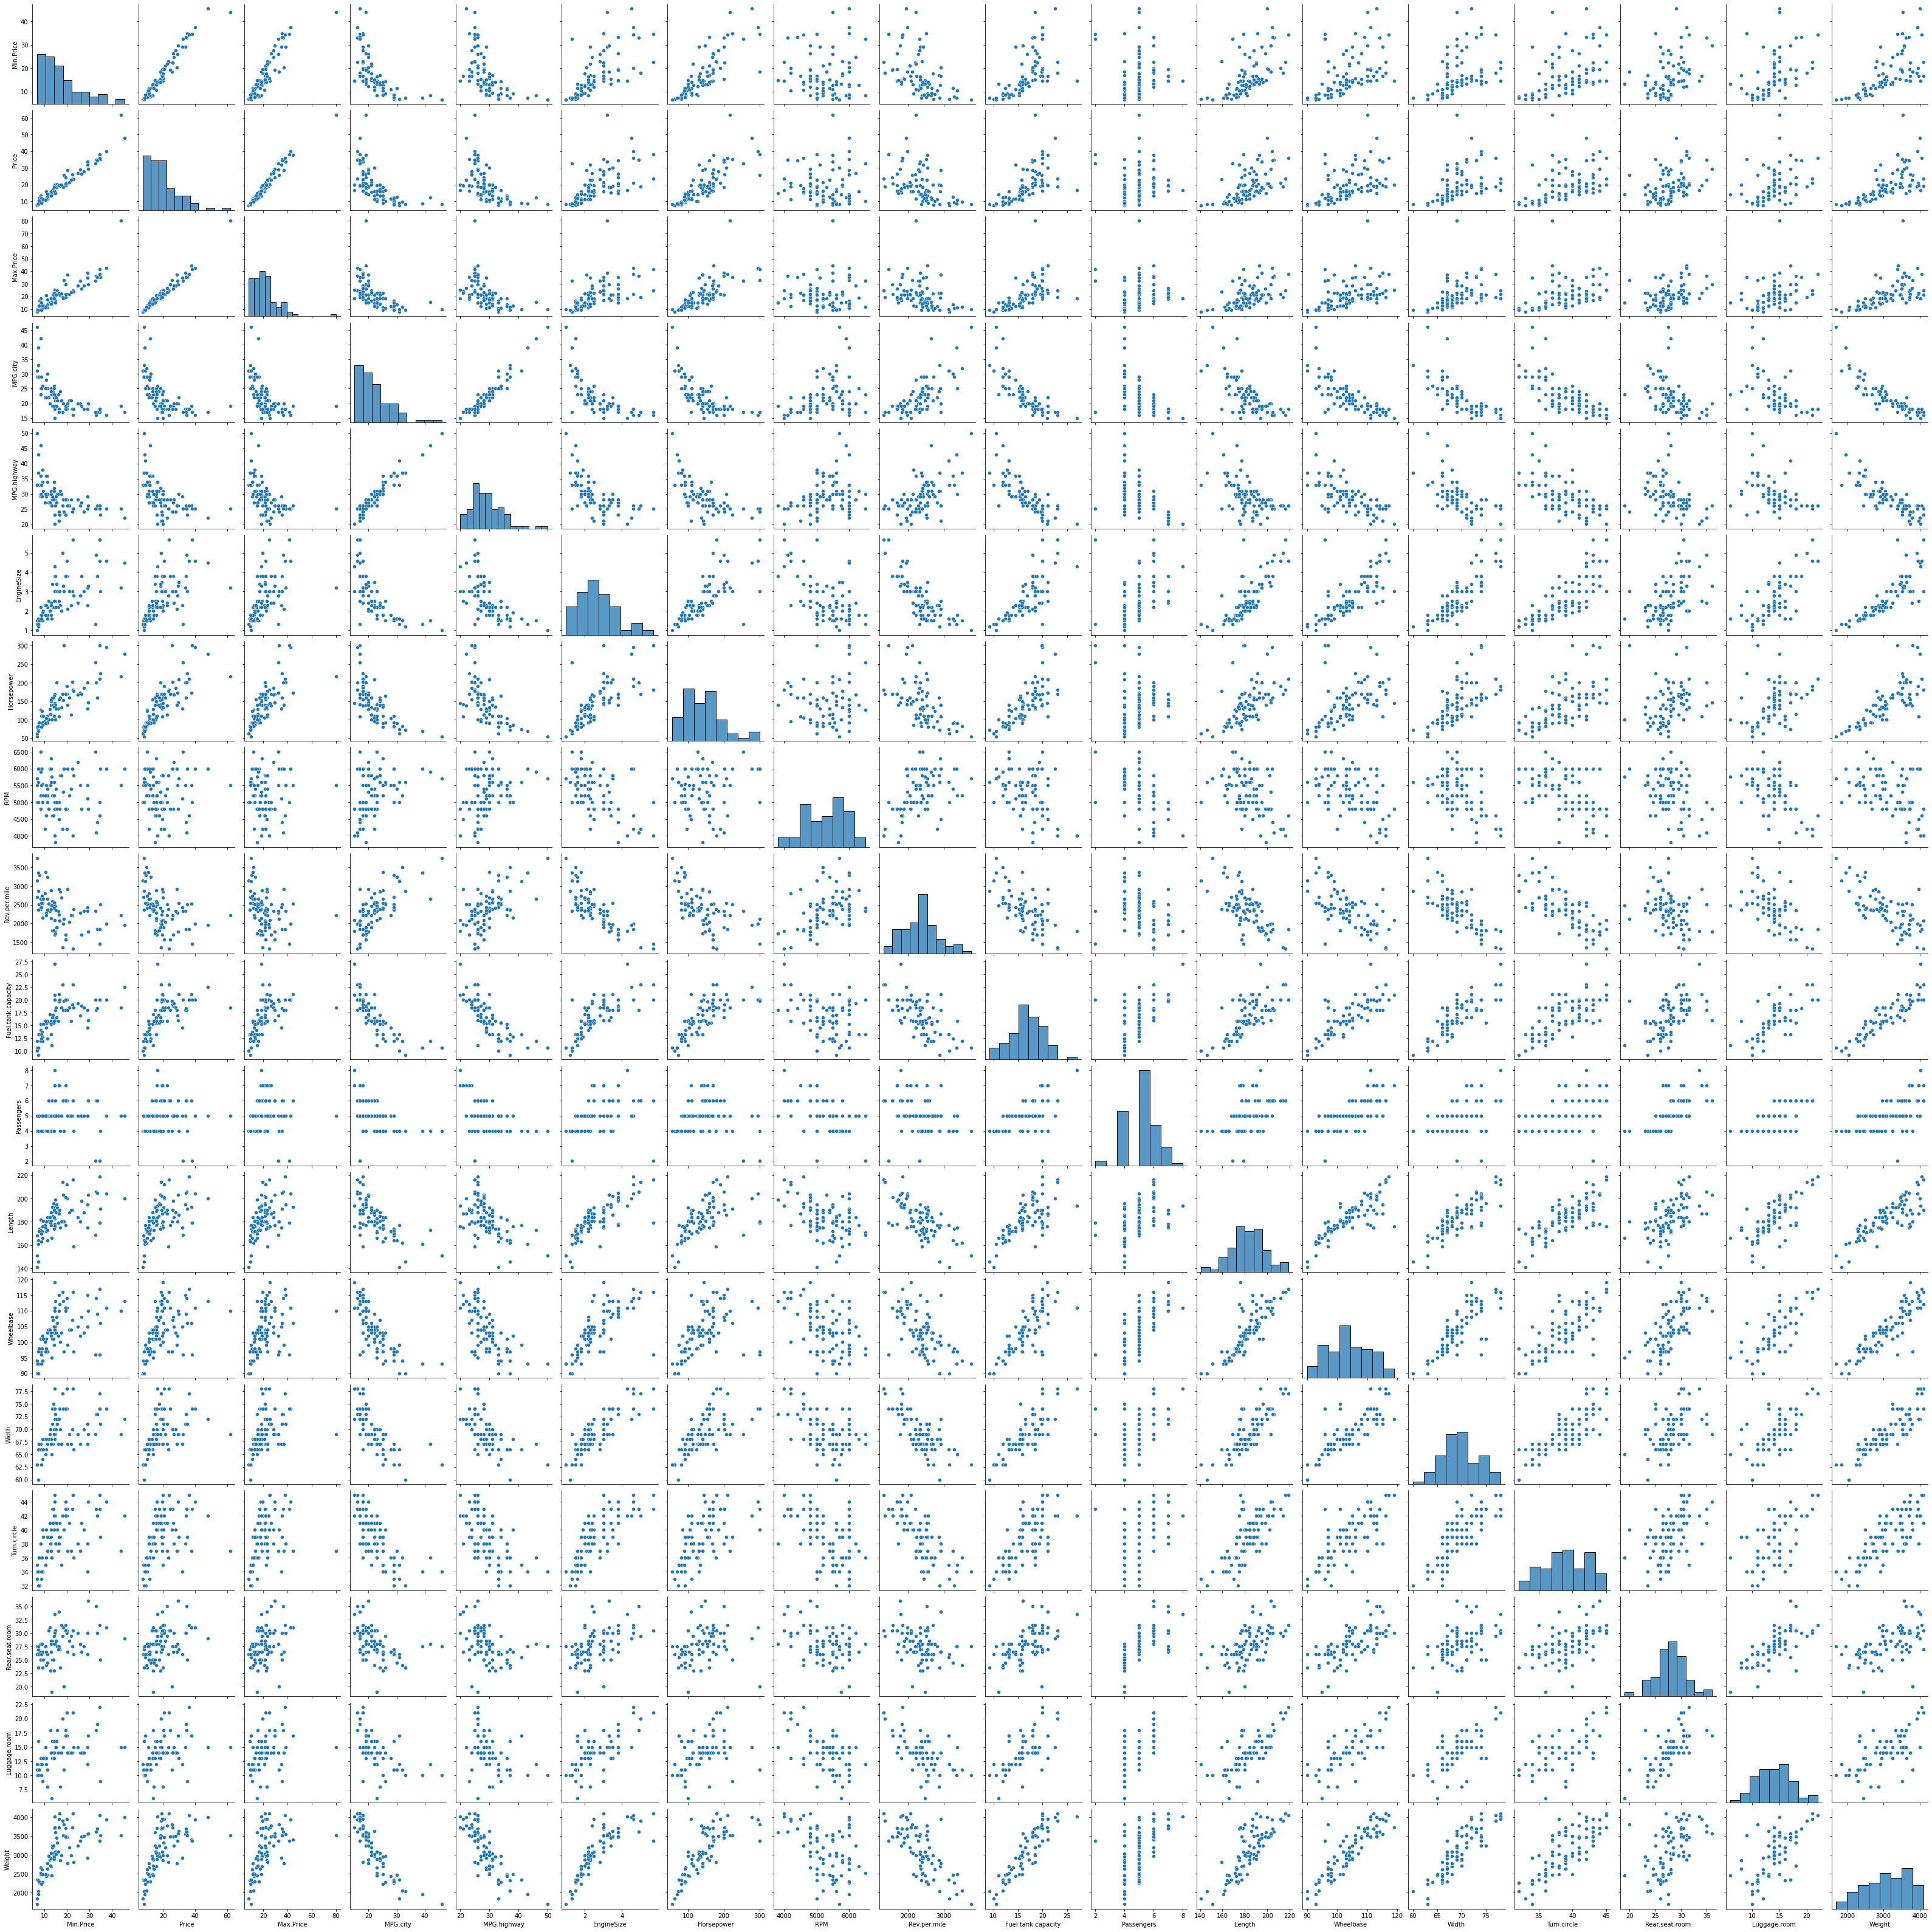

In [19]:
sns.pairplot(df)
# pd.plotting.scatter_matrix(df, alpha=0.2)

* __Los datos categóricos los etiquetaremos como 'unknown' por que tenemos la información de los parámetros pero solamente desconocemos la categoria__

# 2) Utilizar una estrategia de imputación para el manejo de datos faltantes, y justificar él porque

* __Al ser datos continuos y con una distribución paramétrica, se imputarán los datos a partir de la media de sus respectivas columnas__

In [40]:
# 2) Utilizar una estrategia de imputación para el manejo de datos faltantes, y justificar él porque
# copia del dataframe para no modificar el set original
df_n = df.copy()
for c in df_n:
    if df[c].dtype == object:
        df_n[c].fillna('unknown', inplace=True)
    else:
        df_n[c].fillna(df_n[c].dropna().mean(), inplace=True)
    
df_n.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [67]:
# plt.bar(df.mean() - df_n.mean())
pd.DataFrame(df.mean()-df_n.mean())

,0
Min.Price,-3.552714e-15
Price,0.000000e+00
Max.Price,0.000000e+00
MPG.city,0.000000e+00
MPG.highway,0.000000e+00
EngineSize,0.000000e+00
Horsepower,0.000000e+00
RPM,0.000000e+00
Rev.per.mile,0.000000e+00
Fuel.tank.capacity,0.000000e+00


# 3) Usar gráficos para ver el antes y después de la imputación

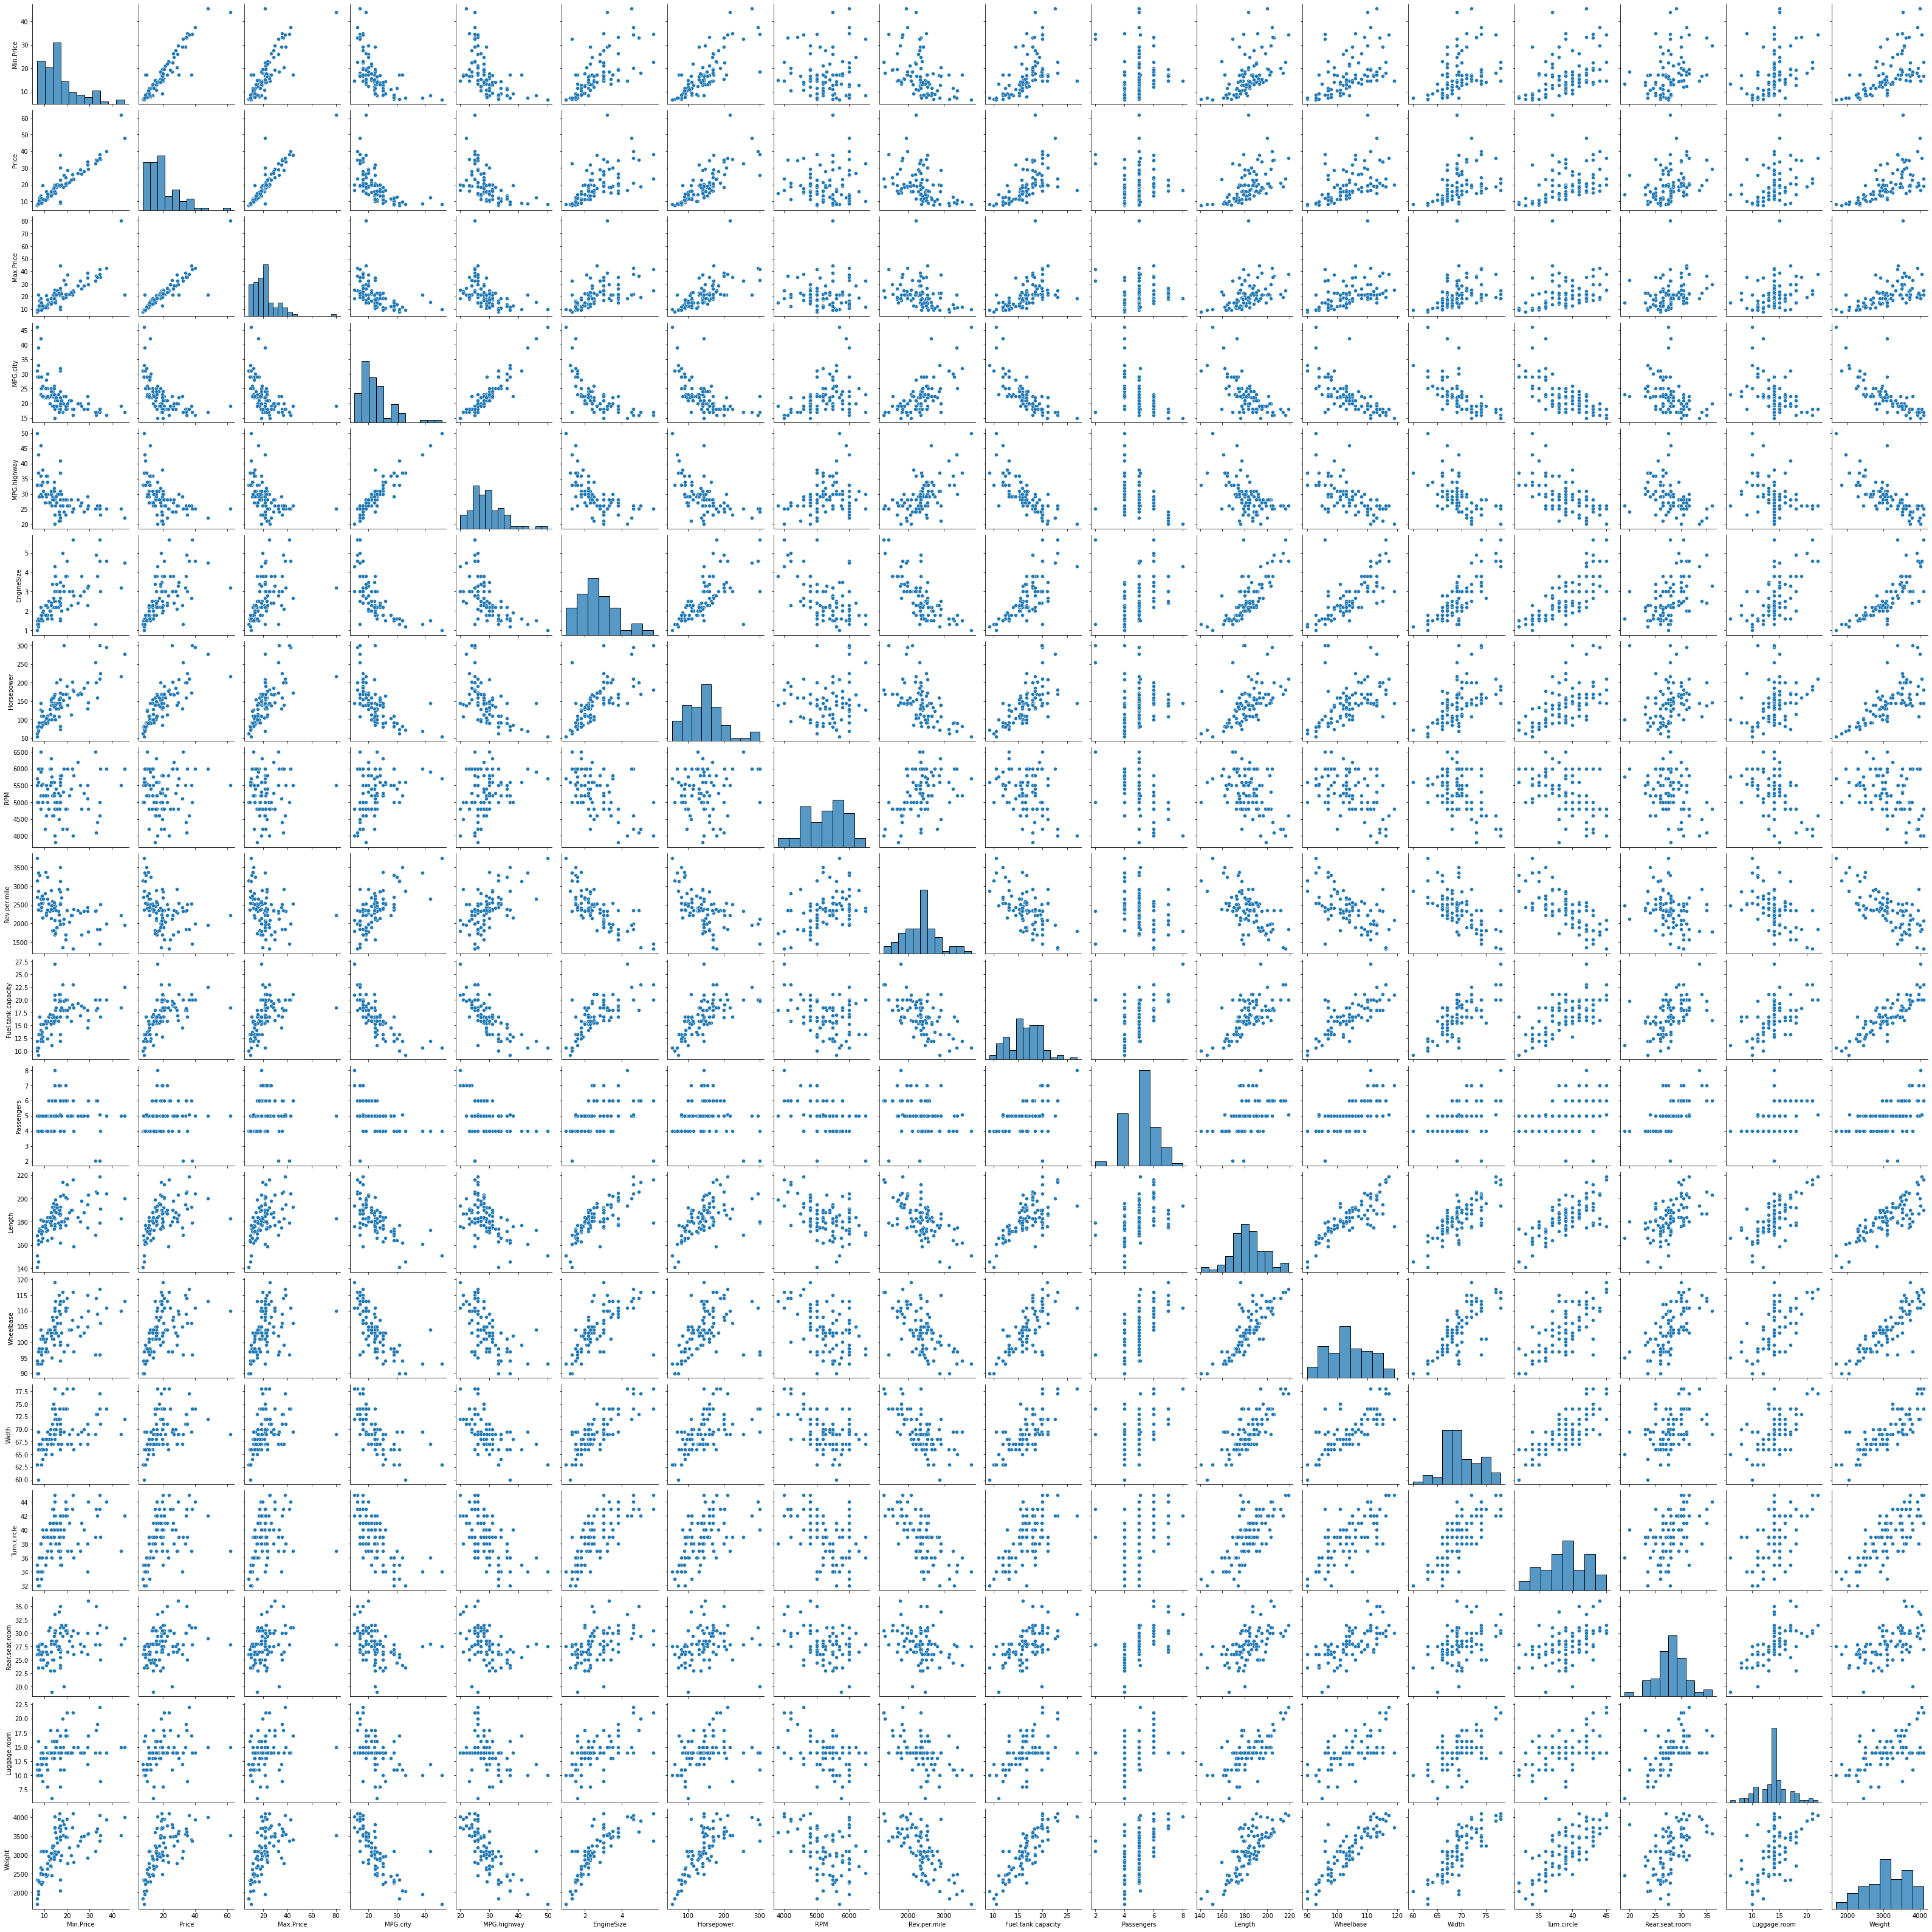

In [48]:
# 3) Usar gráficos para ver el antes y después de la imputación
sns.pairplot(df_n)

# 4) Usando los datos imputados, realizar un estudio de correlación. Use la variable MPG.city como variable objetivo (Y)

<AxesSubplot:>

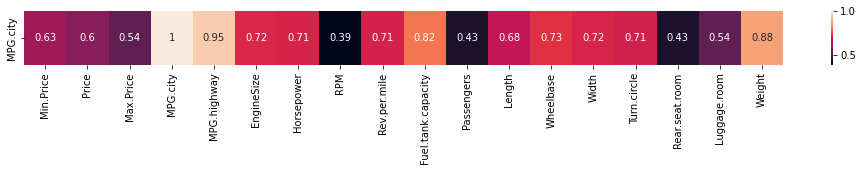

In [76]:
# 4) Usando los datos imputados, realizar un estudio de correlación. Use la variable MPG.city como variable objetivo (Y)
plt.figure(figsize=(17, 1))
sns.heatmap(pd.DataFrame(abs(df.corr()['MPG.city'])).T, annot=True)

<AxesSubplot:>

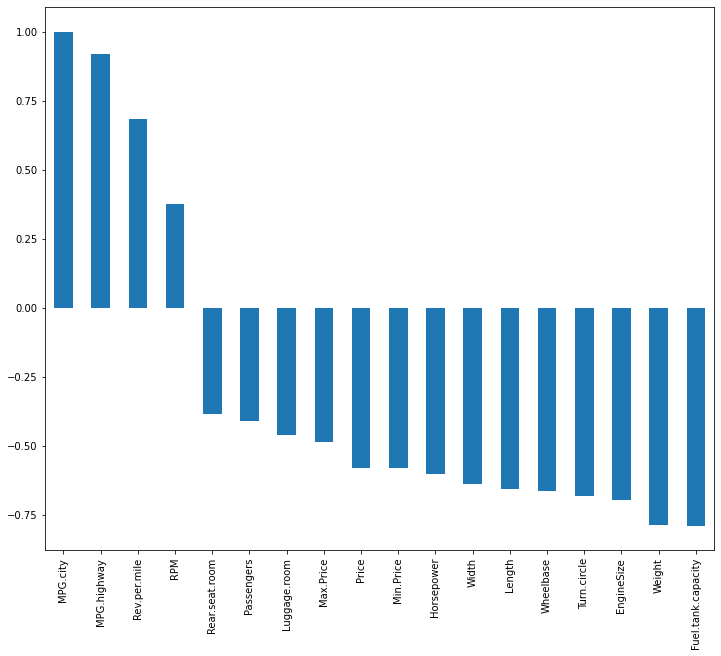

In [92]:
plt.figure(figsize=(12,10))
df_n.corr()['MPG.city'].sort_values(ascending=False).plot(kind='bar')

# 5) Explique porque se decidió eliminar columnas (Si es el caso)

- __No se eliminaron columans, se llenaron los datos faltantes con la media de cada parámetro; en el caso de los datos categóricos se marcaron como desconocidos__